<a href="https://colab.research.google.com/github/R1GBY/ImageNet-Trained-MobileNetV2-Transfered-to-StatueDB/blob/main/MobileNetV2_IMAGENET_Transfered_to_StatueDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorflow Hub'ın İndirilmesi

In [ ]:
!pip install tensorflow_hub

Kütüphane İmport Edilmesi

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
import matplotlib.pylab as plt

GPU ile Çalışma

In [ ]:
%tensorflow_version 2.x
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.15.0

Uninstalling tensorflow-2.4.0:
  Successfully uninstalled tensorflow-2.4.0
     |████████████████████████████████| 411.5MB 42kB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 3.8MB 53.8MB/s 
     |████████████████████████████████| 512kB 50.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=dbd069eeb9959cf7123dbeea1e67049e09e8d445cfcdb965d219dbf1337a9d9a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow-estimator 2.4.0
    U

Diğer Kütüphaneler

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_hub as hub

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pd.set_option("display.precision", 8)

Drive'a Erişim Sağlanması (Collab üzerinden çalıştığımız için)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Veri Tabanı'nın Yolunun Tanımlanması

In [ ]:
data_root='/content/drive/MyDrive/VeriTabani/StatueDB'

Verilerin Eğitim - Doğrulama için Ayrılması ve Veri Boyutlarının Belirlenmesi

In [ ]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)

/content/drive/MyDrive/VeriTabani/StatueDB
Found 61 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [ ]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 2)
['Class_A' 'Class_B']


Önceden Eğitilmiş Modelin Derlenmesi

In [ ]:
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


Kendi Veri Setimizle Eğitim

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
    
train_generator,
epochs=10,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history

Epoch 1/10
8/8 [==============================] - 330s 41s/step - loss: 0.5170 - acc: 0.6693 - val_loss: 0.2124 - val_acc: 0.9344
Epoch 2/10
8/8 [==============================] - 33s 4s/step - loss: 0.1822 - acc: 0.9264 - val_loss: 0.1048 - val_acc: 0.9836
Epoch 3/10
8/8 [==============================] - 71s 9s/step - loss: 0.0813 - acc: 0.9642 - val_loss: 0.1054 - val_acc: 0.9672
Epoch 4/10
8/8 [==============================] - 76s 10s/step - loss: 0.0559 - acc: 0.9779 - val_loss: 0.0702 - val_acc: 1.0000
Epoch 5/10
8/8 [==============================] - 74s 9s/step - loss: 0.0448 - acc: 0.9839 - val_loss: 0.0327 - val_acc: 1.0000
Epoch 6/10
8/8 [==============================] - 69s 9s/step - loss: 0.0308 - acc: 0.9936 - val_loss: 0.0320 - val_acc: 1.0000
Epoch 7/10
8/8 [==============================] - 75s 9s/step - loss: 0.0245 - acc: 0.9866 - val_loss: 0.0360 - val_acc: 1.0000
Epoch 8/10
8/8 [==============================] - 70s 9s/step - loss: 0.0170 - acc: 0.9973 - val_loss

Elde Edilen Modelin Kaydedilmesi

In [ ]:
STATUE_SAVED_MODEL = "saved_models/3"
tf.keras.experimental.export_saved_model(model, STATUE_SAVED_MODEL)
statue_model = tf.keras.experimental.load_from_saved_model(STATUE_SAVED_MODEL,
custom_objects={'KerasLayer':hub.KerasLayer})

Instructions for updating:
Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.


Instructions for updating:
Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.


FailedPreconditionError: ignored

In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


İlk Elemanlar için Tahmin Sonuçları

In [ ]:
tf_model_predictions = model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Class_A,Class_B
0,0.00086474,0.99913532
1,0.00312402,0.99687600
2,0.00055981,0.99944013
3,0.94610095,0.05389909
4,0.00217972,0.99782026


Bazı Görsellerde Tahmin Sonuçları (Yeşiller Doğru, Kırmızılar Yanlış Tahmin)

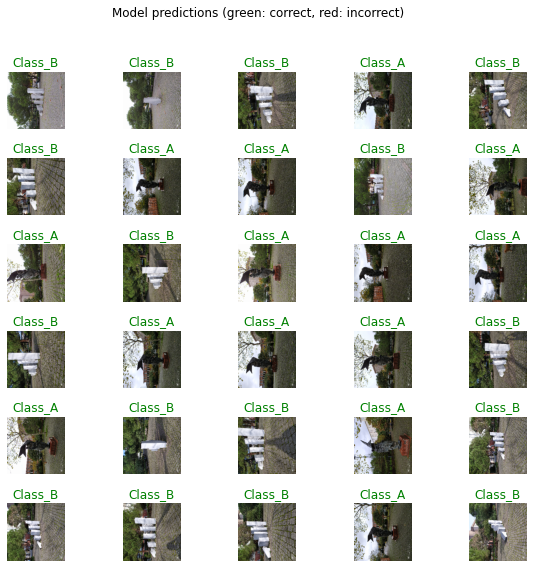

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

Metriklerin Zaman İçinde Değişimlerinin Grafiğe Dökülmesi

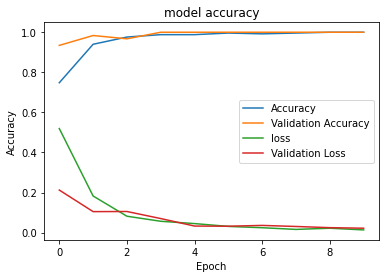

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist["acc"])
plt.plot(hist['val_acc'])
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()